In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
netflix = pd.read_csv("netflix_titles.csv")
df = netflix.copy()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [14]:
df.shape

(8807, 12)

In [15]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [23]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [24]:
df.nunique()

show_id         5332
type               2
title           5332
director        3945
cast            5200
country          604
date_added      1453
release_year      72
rating            14
duration         198
listed_in        335
description     5321
dtype: int64

In [25]:
df = df.dropna()

In [26]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [27]:
df.shape

(5332, 12)

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,5332.0,2012.742123,9.625831,1942.0,2011.0,2016.0,2018.0,2021.0


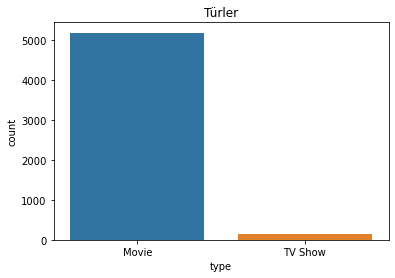

In [87]:
sns.countplot(x = 'type' , data = df )
plt.title('Türler');

Text(0.5, 1.0, 'Rating')

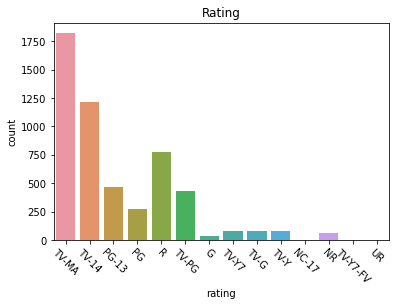

In [90]:
sns.countplot(x = 'rating' , data = df )
plt.xticks(rotation=-45);
plt.title('Rating')

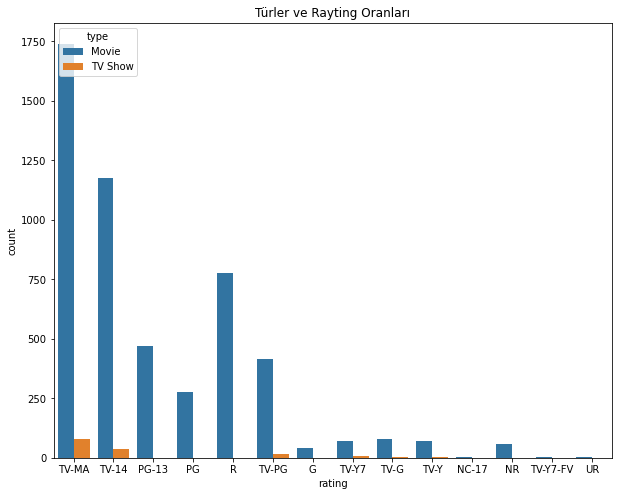

In [102]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'rating' , hue = 'type' , data = df)
plt.title("Türler ve Rayting Oranları");

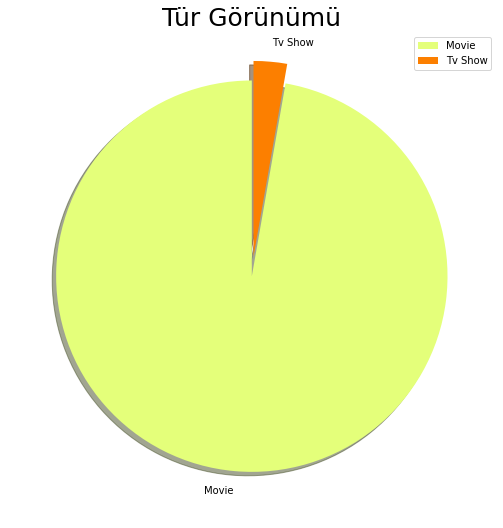

In [101]:
labels = ["Movie" , "Tv Show"]
size = df['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size , labels = labels , colors = colors, explode = explode, shadow = True , startangle = 90)
plt.title("Tür Görünümü" , fontsize = 25)
plt.legend();

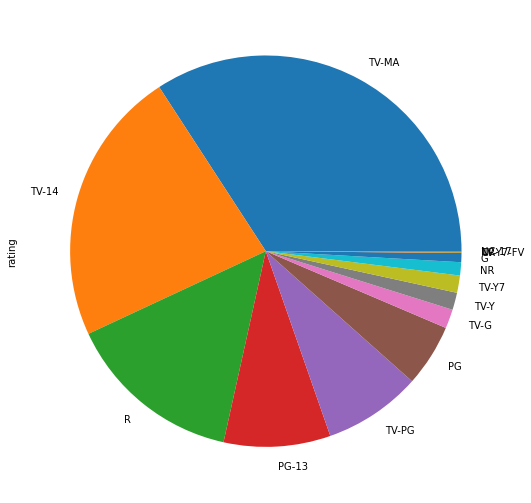

In [99]:
df['rating'].value_counts().plot.pie();

In [103]:
! pip install WordCloud

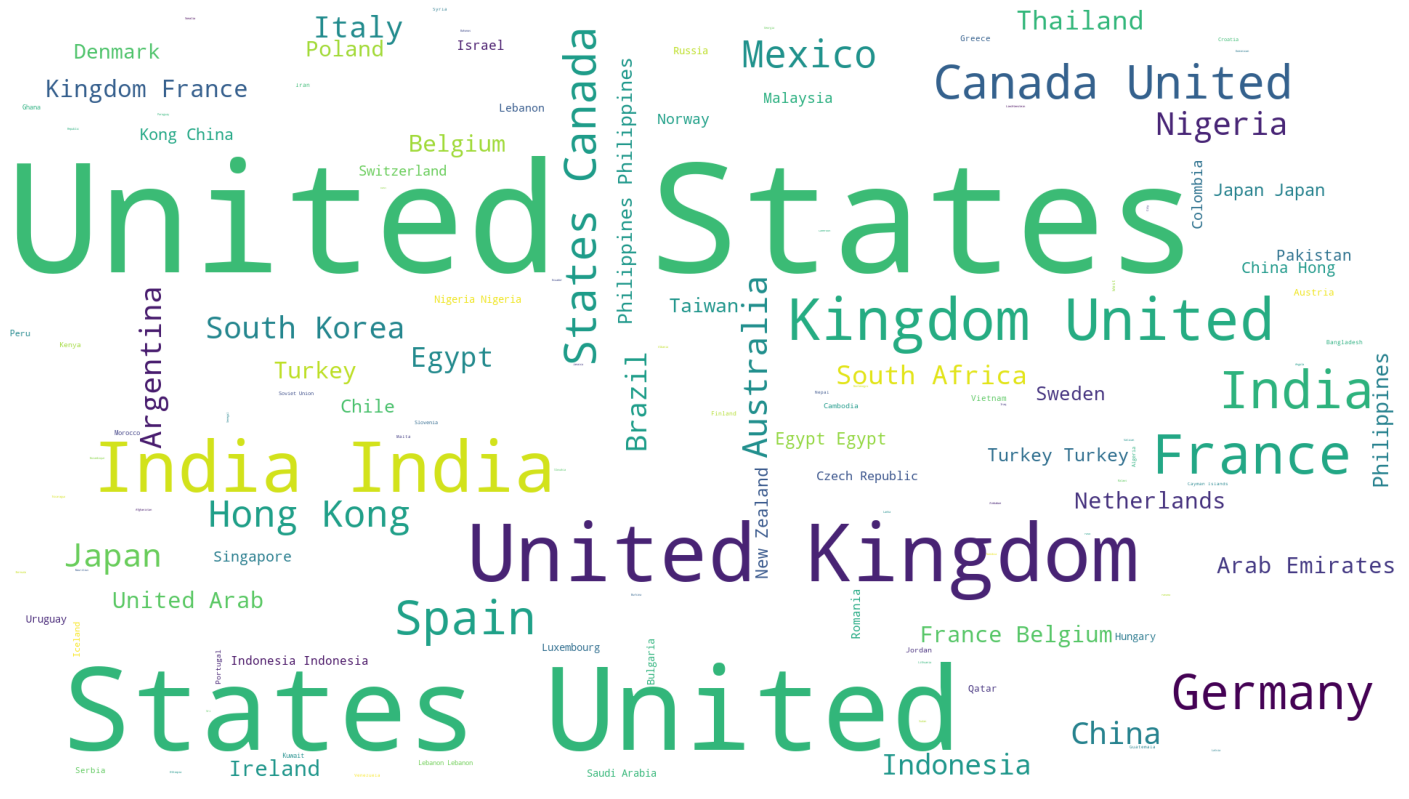

In [107]:
plt.subplots(figsize = (25,15))
wordcloud = WordCloud(
background_color = "white",
width = 1920,
height = 1080
).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("country.png");

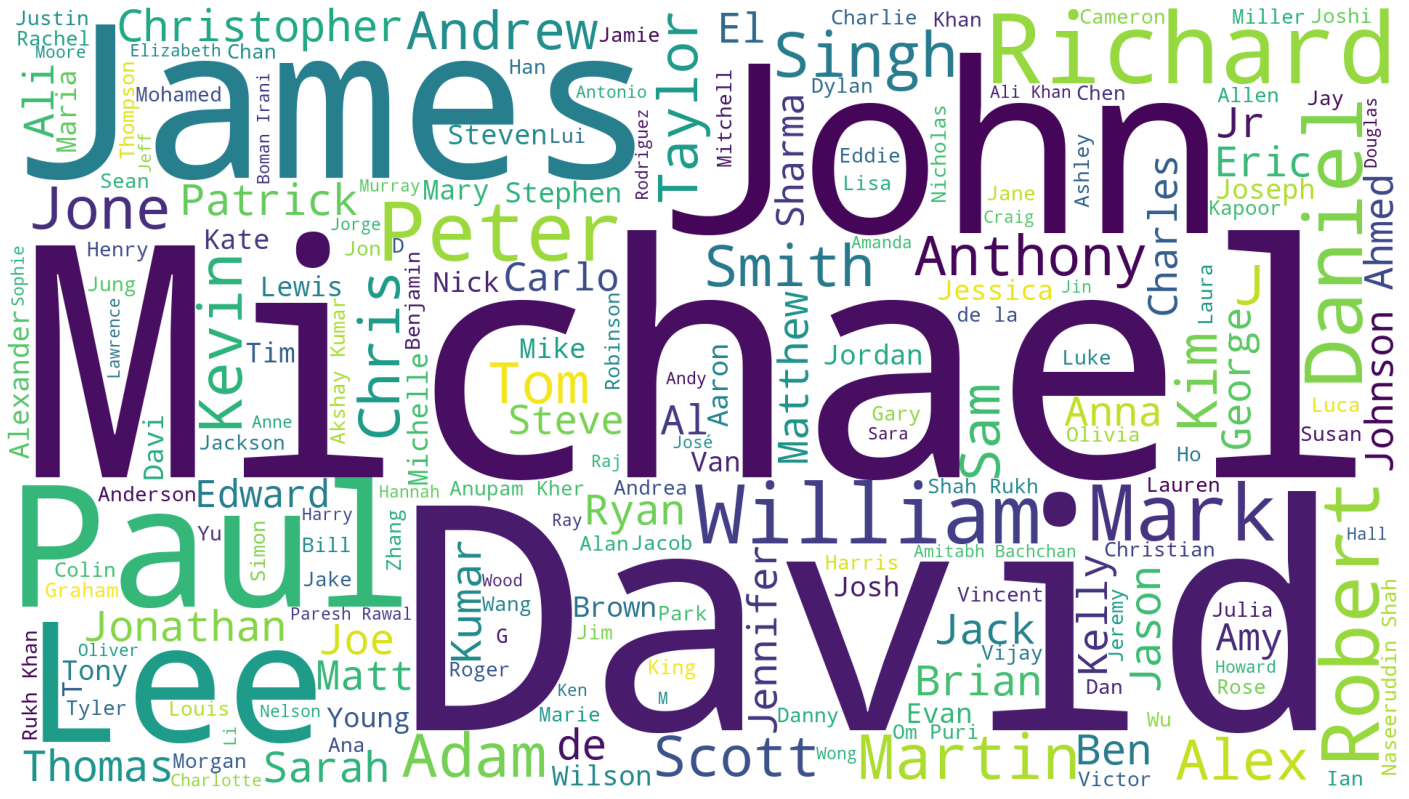

In [108]:
plt.subplots(figsize = (25,15))
wordcloud = WordCloud(
background_color = "white",
width = 1920,
height = 1080
).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("cast.png");

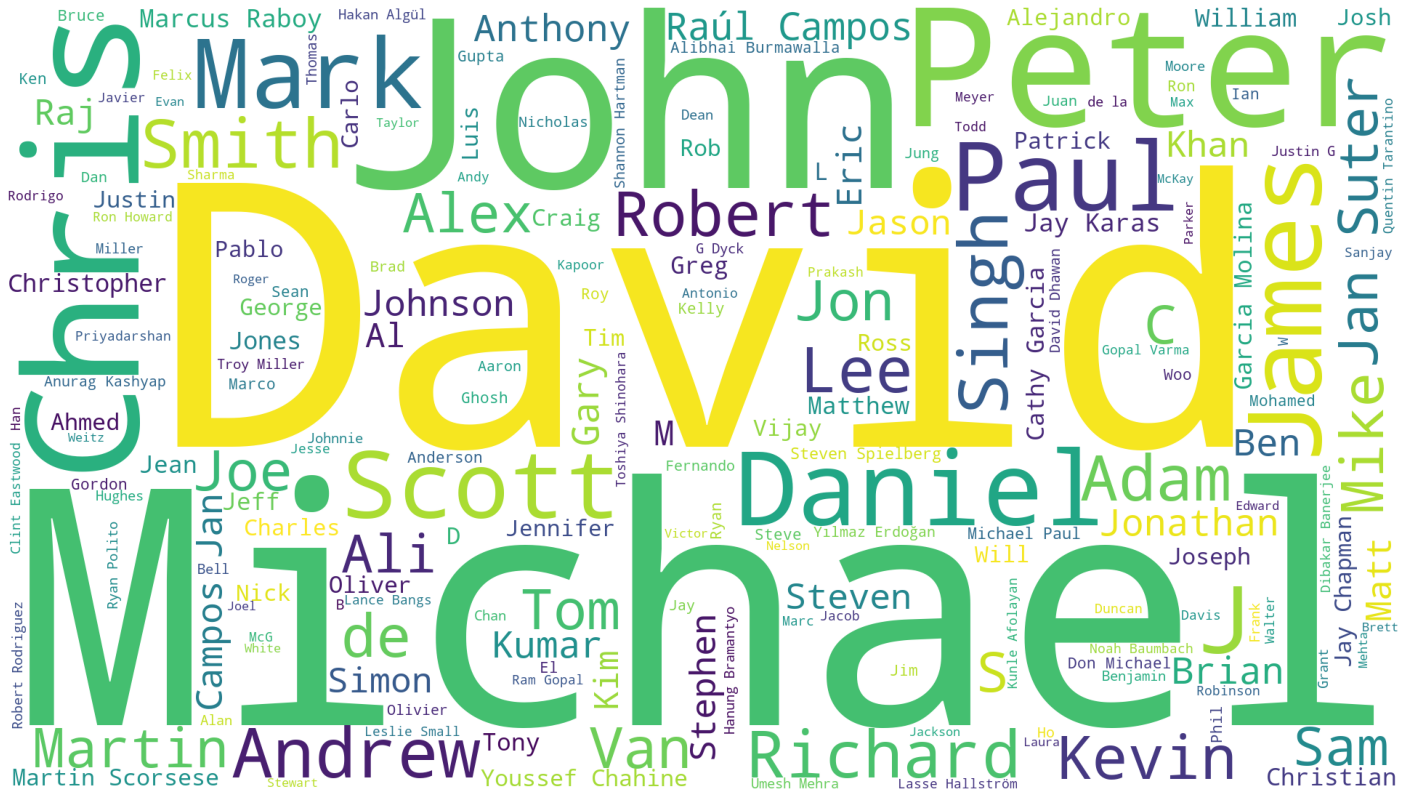

In [109]:
plt.subplots(figsize = (25,15))
wordcloud = WordCloud(
background_color = "white",
width = 1920,
height = 1080
).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("director.png");